# Plotting a few event rates for DM-electron scattering
Currently this uses the formula which assumes the outgoing electron is just a plane wave. Later we will modify this calculation to account for the atomic potential.

### First we just calculate the rates for Helium and Xenon using two benchmark masses and for both the heavy mediator ($F_{\rm DM} \sim 1/q^2)$) and light mediator  ($F_{\rm DM} = 1$) cases.

In [1]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *
import cmocean

np = 20 # accuracy of p integral
nq = 20 # accuracy of q integral
ne = 200 # number of energies
nv = 1000 # number of v_mins

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

# tabulate gmin before putting it in electron recoil rate function
# just make sure that there are enough v_min values so the interpolation is accurate, 1000 will do
vmin = linspace(0.0,850.0,nv)
gmin = (1-0.2)*gvmin_Isotropic(vmin) + 0.2*gvmin_Triaxial(vmin)

m1 = 10.0
m2 = 1000.0

RHe_1_L = ElectronRecoilRate(He4,E_r_vals,m1,sigma_e,LightMediator,vmin,gmin,nq=nq)
RHe_2_L = ElectronRecoilRate(He4,E_r_vals,m2,sigma_e,LightMediator,vmin,gmin,nq=nq)
RHe_1_H = ElectronRecoilRate(He4,E_r_vals,m1,sigma_e,HeavyMediator,vmin,gmin,nq=nq)
RHe_2_H = ElectronRecoilRate(He4,E_r_vals,m2,sigma_e,HeavyMediator,vmin,gmin,nq=nq)

RXe_1_L = ElectronRecoilRate(Xe131,E_r_vals,m1,sigma_e,LightMediator,vmin,gmin,nq=nq)
RXe_2_L = ElectronRecoilRate(Xe131,E_r_vals,m2,sigma_e,LightMediator,vmin,gmin,nq=nq)
RXe_1_H = ElectronRecoilRate(Xe131,E_r_vals,m1,sigma_e,HeavyMediator,vmin,gmin,nq=nq)
RXe_2_H = ElectronRecoilRate(Xe131,E_r_vals,m2,sigma_e,HeavyMediator,vmin,gmin,nq=nq)


### Now we plot each case
For a direct comparison we follow the style from Lee et al. https://arxiv.org/abs/1508.07361 although we don't have Germanium yet

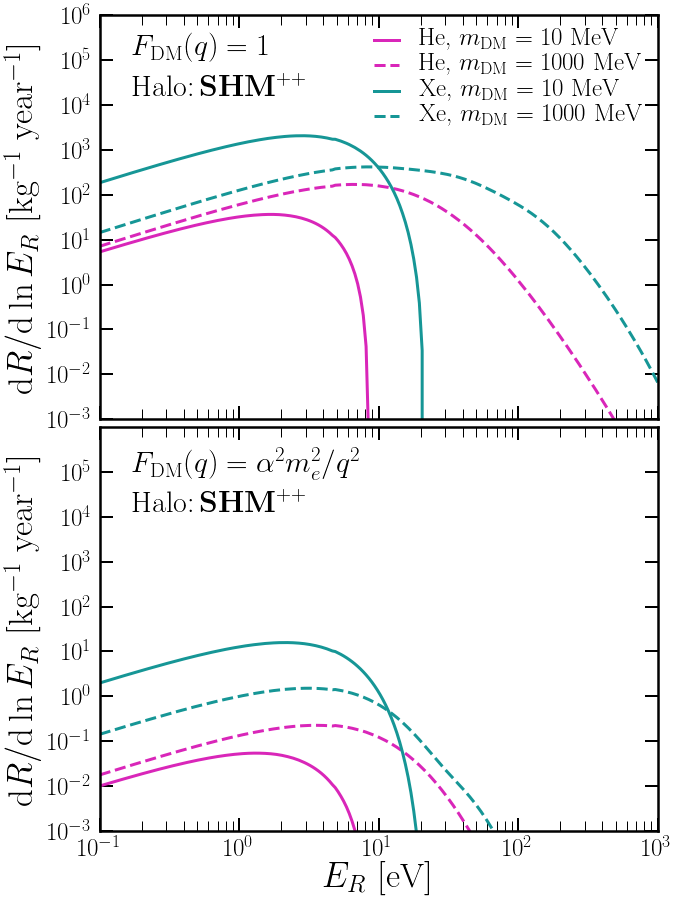

In [2]:
#####
# set up plot
hspace=0.02
lw=2.5
lfs=35
tfs=25
size_x=10
size_y=15

xlab2 = r'$E_R$ [eV]'
ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=hspace)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_ylabel(ylab1,fontsize=lfs)
ax2.set_ylabel(ylab2,fontsize=lfs)
ax2.set_xlabel(xlab2,fontsize=lfs)
#####




# Plot    
x = E_r_vals*1000.0 
col = cmocean.cm.phase(linspace(0.3,0.7,2))

ax1.plot(x,RHe_1_H,'-',color=col[0,:],lw=3,label=r'He, $m_{\rm DM} = '+str(int(m1))+'$ MeV')
ax1.plot(x,RHe_2_H,'--',color=col[0,:],lw=3,label=r'He, $m_{\rm DM} = '+str(int(m2))+'$ MeV')
ax1.plot(x,RXe_1_H,'-',color=col[1,:],lw=3,label=r'Xe, $m_{\rm DM} = '+str(int(m1))+'$ MeV')
ax1.plot(x,RXe_2_H,'--',color=col[1,:],lw=3,label=r'Xe, $m_{\rm DM} = '+str(int(m2))+'$ MeV')

ax2.plot(x,RHe_1_L,'-',color=col[0,:],lw=3)
ax2.plot(x,RHe_2_L,'--',color=col[0,:],lw=3)
ax2.plot(x,RXe_1_L,'-',color=col[1,:],lw=3)
ax2.plot(x,RXe_2_L,'--',color=col[1,:],lw=3)

# Tweak ranges on show
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([0.1,1.0e3])
ax1.set_ylim([1.0e-3,1.0e6])
ax1.set_xticklabels([])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,1.0e3])
ax2.set_ylim([1.0e-3,1.0e6])
ax1.set_yticks(10.0**arange(-3,7))
ax2.set_yticks(10.0**arange(-3,6))

# Labels
ax1.legend(frameon=False,fontsize=25,labelspacing=0.1,borderpad=0.1,handlelength=1)
plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1$',fontsize=30)
plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)
plt.gcf().text(0.17,0.805,r'Halo:\,{\bf SHM}$^{++}$',fontsize=30)
plt.gcf().text(0.17,0.42,r'Halo:\,{\bf SHM}$^{++}$',fontsize=30)


# Save
plt.show()
fig.savefig('../plots/DMRates_HeXe.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_HeXe.png',bbox_inches='tight')